In [ ]:
# %load_ext autoreload
# %autoreload 2

In [1]:
import json
import argparse
import pandas as pd
from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import config_sim
from cadCAD.engine import ExecutionContext, ExecutionMode, Executor
from cadCAD import configs
import copy
import numpy as np

from simulation import (CommonsSimulationConfiguration, bootstrap_simulation,
                        partial_state_update_blocks)
from utils import new_probability_func, new_exponential_func, new_gamma_func, new_random_number_func, new_choice_func

In [2]:
def print_plot(df_, param_name, param_values, state_var):
    ax = None
    N = len(param_values)
#     xticks = list(df_['timestep'].drop_duplicates())
    for i in range(N):
        ax = df_[df_['simulation']==i+1].plot('timestep', state_var,
                                              grid=True,
#                                               xticks=xticks,
#                                               yticks=list(range(1+max(df['box_A'].max(),df['box_B'].max()))),
                                              legend = (ax == None),
#                                               colormap = 'RdYlGn',
                                              figsize=(12,6),
                                              ax = ax
                                      )
    ax.legend([f'{param_name}={p}' for p in param_values])

In [3]:
default_params = dict(hatchers=100,
                      proposals=5,
                      hatch_tribute=0.40,
                      max_proposal_request=0.48,
                      days_to_80p_of_max_voting_weight=30,
                      exit_tribute=0.25,
                      vesting_80p_unlocked=60,  # default
                      kappa=2,  # defauilt
                      timesteps_days=360,
#                       timesteps_days=1095,
                      random_seed=42
             )
default_params

{'hatchers': 100,
 'proposals': 5,
 'hatch_tribute': 0.4,
 'max_proposal_request': 0.48,
 'days_to_80p_of_max_voting_weight': 30,
 'exit_tribute': 0.25,
 'vesting_80p_unlocked': 60,
 'kappa': 2,
 'timesteps_days': 360,
 'random_seed': 42}

In [4]:
param_name = 'hatchers'
param_values = list(range(10, 151, 10))

# param_name = 'proposals'
# param_values = list(range(5, 51, 5))

# param_name = 'hatch_tribute'
# param_values = np.arange(0.1, 1, 0.1).tolist()

# param_name = 'max_proposal_request'
# param_values = np.arange(0.1, 1, 0.1).tolist()

# param_name = 'days_to_80p_of_max_voting_weight'
# param_values = np.arange(15, 100, 15).tolist()

# param_name = 'exit_tribute'
# param_values = np.arange(0.05, 0.5, 0.05).tolist()

# param_values

In [5]:
systems_params = []
for val in param_values:
    temp = copy.copy(default_params)
    temp[param_name] = val
    systems_params.append(temp)
    
# systems_params

* **NOTE**: Make sure you're using the `no_deepcopy` version of cadCAD and the `network_snapshot` partial state update block is enabled

In [7]:
# partial_state_update_blocks

In [ ]:
del configs[:]

exp = Experiment()

# TOTAL_SEEDS = 5
# seeds = 40 * np.arange(0, TOTAL_SEEDS, 1)

for system_x in systems_params:
    c = CommonsSimulationConfiguration(**system_x)
#     initial_conditions, simulation_parameters = bootstrap_simulation(c)
    initial_conditions, _ = bootstrap_simulation(c)
#     simulation_parameters = config_sim({
    simulation_parameters = {
        'N': 1,
        'T': range(c.timesteps_days),
        'M': {
            # "sentiment_decay": 0.01, #termed mu in the state update function
            # "min_proposal_age_days": 7, # minimum periods passed before a proposal can pass,
            # "sentiment_sensitivity": 0.75,
            # 'min_supp':50, #number of tokens that must be stake for a proposal to be a candidate
#             "debug": [False],
#             "alpha_days_to_80p_of_max_voting_weight": [c.alpha()],
#             "max_proposal_request": [c.max_proposal_request],
#             "random_seed": [c.random_seed],
#             "probability_func": [new_probability_func(seed) for seed in seeds],
#             "exponential_func": [new_exponential_func(seed) for seed in seeds],
#             "gamma_func": [new_gamma_func(seed) for seed in seeds],
#             "random_number_func": [new_random_number_func(seed) for seed in seeds],
#             "choice_func": [new_choice_func(seed) for seed in seeds]
            "debug": False,
            "alpha_days_to_80p_of_max_voting_weight": c.alpha(),
            "max_proposal_request": c.max_proposal_request,
            "random_seed": c.random_seed,
            "probability_func": new_probability_func(c.random_seed),
            "exponential_func": new_exponential_func(c.random_seed),
            "gamma_func": new_gamma_func(c.random_seed),
            "random_number_func": new_random_number_func(c.random_seed),
            "choice_func": new_choice_func(c.random_seed)
        }
#     })
    }

    exp.append_configs(
        initial_state=initial_conditions,
        partial_state_update_blocks=partial_state_update_blocks,
        sim_configs=simulation_parameters
    )
    
# assert(len(configs) == len(param_values) * TOTAL_SEEDS)

# Do not use multi_proc, breaks ipdb.set_trace()
exec_mode = ExecutionMode()
# multi_proc_context = ExecutionContext(exec_mode.multi_mode)
multi_proc_context = ExecutionContext()
executor = Executor(multi_proc_context, configs)
raw_system_events, tensor_field, sessions = executor.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 15
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1095, 9, 1, 8)


Initializing configurations:   0%|          | 0/15 [00:00<?, ?it/s]

Execution Method: local_simulations
SimIDs   : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ns       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ExpIDs   : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Execution Mode: parallelized


In [7]:
df = pd.DataFrame(raw_system_events)
df_final = df[df.substep.eq(2)]

In [8]:
df_final['simulation'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

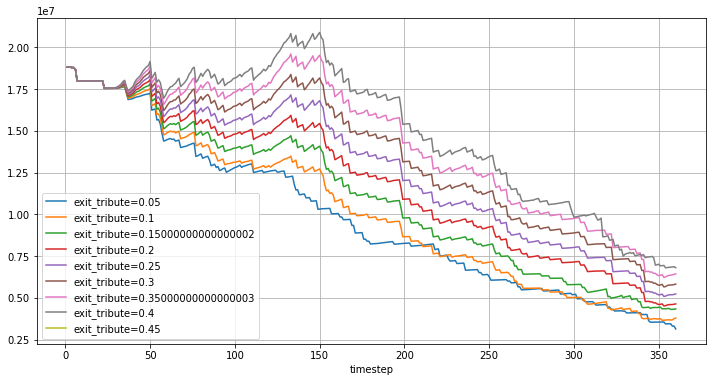

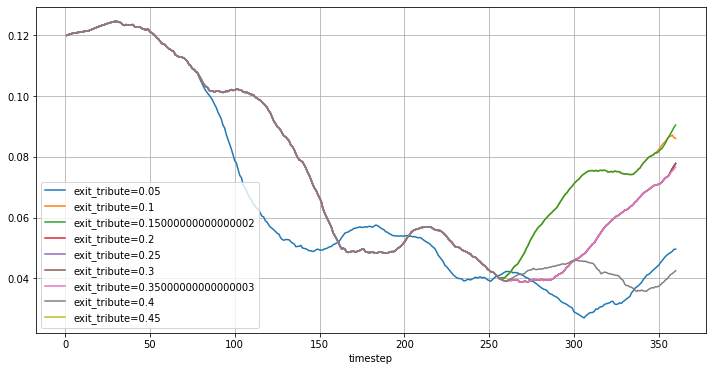

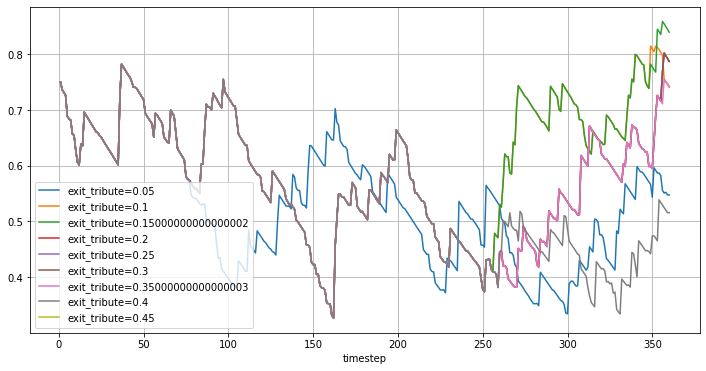

In [9]:
print_plot(df_final, param_name, param_values, 'funding_pool')
print_plot(df_final, param_name, param_values, 'token_price')
print_plot(df_final, param_name, param_values, 'sentiment')

### Store network metrics

In [10]:
from network_utils import get_participants, get_proposals, ProposalStatus

In [11]:
metrics = []
for i in df_final.simulation.unique():
    initial_network = df_final[df_final.simulation == i].iloc[0, 0]
    last_network = df_final[df_final.simulation == i].iloc[-1, 0]
    p_candidates = get_proposals(last_network, status=ProposalStatus.CANDIDATE)
    candidates = len(p_candidates)
    p_actives = get_proposals(last_network, status=ProposalStatus.ACTIVE)
    actives = len(p_actives)
    p_completed = get_proposals(last_network, status=ProposalStatus.COMPLETED)
    completed = len(p_completed)
    p_failed = get_proposals(last_network, status=ProposalStatus.FAILED)
    failed = len(p_failed)
    participants = len(get_participants(last_network))
    
    funds_candidates = sum([p.funds_requested for _, p in p_candidates])
    funds_actives = sum([p.funds_requested for _, p in p_actives])
    funds_completed = sum([p.funds_requested for _, p in p_completed])
    funds_failed = sum([p.funds_requested for _, p in p_failed])
    
    metrics.append([
        i,
        participants,
        candidates, funds_candidates,
        actives, funds_actives,
        completed, funds_completed,
        failed, funds_failed
        
    ])

columns = [
    'simulation', 'participants', 'candidates', 'funds_candidates',
    'actives', 'funds_actives', 'completed', 'funds_completed', 'failed', 'funds_failed'
]

df_metrics = pd.DataFrame(metrics, columns=columns)
df_metrics.to_csv(f'./data/{param_name}_network_metrics.csv', index=False)

### Store simulation raw data

In [12]:
cols = set(df_final.columns) - set(['commons', 'network', 'policy_output'])
df_final[cols].to_csv(f'./data/{param_name}.csv', index=False)